# Proyecto integrador para el Módulo de analista de Datos - ISPC

#### Módulo: Analista de datos (Estádistica y Exploración de datos, Ciencia de Datos y Procesamiento de Datos)
#### Alumno: PALOMEQUE, Jonathan Manuel
#### Carrera: Tecnicatura Superior en Ciencia de datos e IA
#### Institución: Instituto Superior Politécnico Córdoba (ISPC)
#### Año: 2024

## Desarrollo del proyecto: 

### I) Importar Pandas, Numpy y Matplotlib:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### II) Cargar DataSet y crear el Dataframe:

In [2]:
dataSet = pd.read_csv('Ventas-Original.csv')

dataframe = pd.DataFrame(dataSet)

### III) Descripcion del DataSet:

**1- Informacion General sobre el dataframe:**

In [3]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12014 entries, 0 to 12013
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pais              12004 non-null  object 
 1   metodo_orden      12008 non-null  object 
 2   tipo_comercio     12005 non-null  object 
 3   linea             12004 non-null  object 
 4   tipo_producto     12008 non-null  object 
 5   producto          12005 non-null  object 
 6   año               12009 non-null  float64
 7   cuatrimestre      12014 non-null  object 
 8   ventas            12009 non-null  object 
 9   cantidad          12009 non-null  float64
 10  utilidad_bruta_p  12010 non-null  object 
 11  utilidad_bruta    12007 non-null  object 
 12  costos            12009 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB
None


*El resultado brinda informacion de la cantidad de columnas, sus nombres, tipoa de datos y que hay 12.014 filas y 13 columnas. No hay valores Nulos en las columnas*

**2- Imprimir los primeros  10 registros del dataframe:**

In [4]:
print(dataframe.head(10))

        pais   metodo_orden      tipo_comercio     linea tipo_producto  \
0  Argentina  Representante          Mayorista  Mascotas      Juguetes   
1  Argentina           Mail      De proximidad  Mascotas      Juguetes   
2  Argentina       Teléfono  Grandes Almacenes  Infantil       Calzado   
3  Argentina        Website      Especializado    Hombre       Calzado   
4  Argentina        Website      Especializado   Adultos    Vestimenta   
5  Argentina        Website          Mayorista     Mujer        Lentes   
6  Argentina       Teléfono      Especializado     Mujer    Vestimenta   
7  Argentina  Representante       Hipermercado    Hombre        Lentes   
8  Argentina  Representante  Grandes Almacenes  Mascotas      Juguetes   
9  Argentina  Representante          Mayorista    Hombre       Calzado   

                 producto     año cuatrimestre       ventas  cantidad  \
0        Anitibyx armatus  2019.0      C1 2019  $155.040,02   15562.0   
1      Sarcorhamphus papa  2019.0      

**3- Cantidad de registros y columnas:**

In [5]:
cant_filas, cant_columnas = dataframe.shape

print("""
La Cantidad de registros son: {}
La Cantidad de columnas son: {}""".format(cant_filas, cant_columnas))


La Cantidad de registros son: 12014
La Cantidad de columnas son: 13


**4- Cantidad de elementos que NO son nulos por columnas:**

In [6]:
dataframe.count()

pais                12004
metodo_orden        12008
tipo_comercio       12005
linea               12004
tipo_producto       12008
producto            12005
año                 12009
cuatrimestre        12014
ventas              12009
cantidad            12009
utilidad_bruta_p    12010
utilidad_bruta      12007
costos              12009
dtype: int64

**5-Tipos de Datos:**

In [7]:
tipos_datos = dataframe.dtypes
print(tipos_datos)

pais                 object
metodo_orden         object
tipo_comercio        object
linea                object
tipo_producto        object
producto             object
año                 float64
cuatrimestre         object
ventas               object
cantidad            float64
utilidad_bruta_p     object
utilidad_bruta       object
costos               object
dtype: object


*Verifico que hay columnas cuyos datos deberian ser del tipo entero o flotante, los cuales actualmente son del tipo objeto, por lo que deben ser modificados para poder realizar el analisis de los mismos*

**6- Verificar tipos unicos de Columnas categoricas:**

**A- Verificar tipos unicos por columna Pais:**

In [8]:
tiposPaisesUnicos = dataframe['pais'].unique()
tiposPaisesUnicos

array(['Argentina', 'Bolivia', 'Brazil', 'Belize', 'Canada', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Germany', 'Dominican Republic',
       'Ecuador', 'Guatemala', 'Honduras', 'Italy', 'Kazakhstan',
       'Mexico', 'Nicaragua', 'Panama', 'Peru', 'Puerto Rico', 'Paraguay',
       'El Salvador', 'United States', 'Uruguay', 'Venezuela', 'Bermuda',
       'Aruba', nan], dtype=object)

Se detectan valores "Nan", que seran procesados en la limpieza de los datos

**B- Verificar tipos unicos por columna metodo_orden:**

In [12]:
tiposMOUnicos = dataframe['metodo_orden'].unique()
tiposMOUnicos

array(['Representante', 'Mail', 'Teléfono', 'Website', 'Especial',
       'MercadoLibre', nan], dtype=object)

Se detectan valores "Nan", que seran procesados en la limpieza de los datos

**C- Verificar tipos unicos por columna tipo_comercio:**

In [13]:
tiposComercioUnicos = dataframe['tipo_comercio'].unique()
tiposComercioUnicos

array(['Mayorista', 'De proximidad', 'Grandes Almacenes', 'Especializado',
       'Hipermercado', nan], dtype=object)

Se detectan valores "Nan", que seran procesados en la limpieza de los datos

**D- Verificar tipos unicos por columna linea:**

In [14]:
tiposLineaUnicos = dataframe['linea'].unique()
tiposLineaUnicos

array(['Mascotas', 'Infantil', 'Hombre', 'Adultos', 'Mujer', 'Unisex',
       nan], dtype=object)

Se detectan valores "Nan", que seran procesados en la limpieza de los datos

**E- Verificar tipos unicos por columna tipo_producto:**

In [15]:
tiposProductoUnicos = dataframe['tipo_producto'].unique()
tiposProductoUnicos

array(['Juguetes', 'Calzado', 'Vestimenta', 'Lentes', 'Joyas',
       'Accesorios', nan], dtype=object)

Se detectan valores "Nan", que seran procesados en la limpieza de los datos

**F- Verificar tipos unicos por columna producto:**

In [16]:
tiposProUnicos = dataframe['producto'].unique()
tiposProUnicos

array(['Anitibyx armatus', 'Sarcorhamphus papa', 'Oreamnos americanus',
       'Zosterops pallidus', 'Dusicyon thous', 'Amphibolurus barbatus',
       'Chordeiles minor', 'Eolophus roseicapillus',
       'Tamandua tetradactyla', 'Meles meles', 'Speotyte cuniculata',
       'Sus scrofa', 'Eubalaena australis', 'Falco mexicanus',
       'Larus novaehollandiae', 'Butorides striatus', 'Eudyptula minor',
       'Francolinus swainsonii', 'Phalaropus fulicarius',
       'Grus canadensis', 'Isoodon obesulus', 'Genetta genetta',
       'Phoenicopterus ruber', 'Spermophilus parryii', 'Hyaena hyaena',
       'Myiarchus tuberculifer', 'Antilocapra americana',
       'Phalaropus lobatus', 'Phalacrocorax carbo',
       'Phalacrocorax brasilianus', 'Phoeniconaias minor', 'Crax sp.',
       'Chelodina longicollis', 'Antilope cervicapra',
       'Heloderma horridum', 'Diomedea irrorata', 'Carduelis pinus',
       'Theropithecus gelada', 'Anthropoides paradisea',
       'Ninox superciliaris', 'Macropus 

Se detectan valores "Nan", que seran procesados en la limpieza de los datos

**G- Verificar tipos unicos por columna cuatrimestre:**

In [17]:
tiposCuatrimestreUnicos = dataframe['cuatrimestre'].unique()
tiposCuatrimestreUnicos

array(['C1 2019', 'C2 2019', 'C3 2019', 'C4 2019', 'C1 2020', 'C2 2020',
       'C3 2020', 'C4 2020', 'C1 2021', 'C2 2021', 'C3 2021', 'C4 2021'],
      dtype=object)

**H- Verificar tipos unicos por columna año:**

In [18]:
tiposAñoUnicos = dataframe['año'].unique()
tiposAñoUnicos

array([  2019., 201900.,   2020.,     nan,  22020.,  20020.,   2021.,
        20021.,  20211.,  20221.])

*Se verifica una inconsisitencia en los datos, ya que aparecen datos incorrectos, en los años, los cuales seran solucionados en la etapa de limpieza y procesamiento de datos*

### IV) Limpieza y Procesamiento de datos:

**1- Limpieza de celdas vacias:**

*Utilizo el metodo  dropna() para eliminar las filas que contengan celdas vacias, como deseo conservar el DataFrame original, utilizo el argumento inplace=True*

In [19]:
dataframe.dropna(inplace = True)

*Verifico la cantidad de registros  resultantes luego de la limpieza:*

In [20]:
ncant_filas, ncant_columnas = dataframe.shape
print(f"Cantidad de registros: {ncant_filas}. Cantidad de columnas: {ncant_columnas}.")

Cantidad de registros: 11952. Cantidad de columnas: 13.


*De un total original de 12014 filas, quedaron 11952, lo que nos indica que habia 62 filas con celdas vacias*

**2- Datos en Formato incorrecto:**

Es necesario cambiar el tipo de dato de las columnas: *ventas, utilidad_bruta,  costos y utilidad_bruta_p*, del tipo objeto al tipo flotante, ya que verifico que los registros de las columnas ventas, utilidad_bruta y costos, originalmente tiene la siguiente sintaxis: "$155.040,02" y necesito que queden de la siguiente forma: "155040.02" , para poder obtener las medidas de tendencias centrales (media, mediana y desviacion estandar) asi como para realizar acciones de conteo. 

Para hacerlo seguiré los siguientes pasos:
- eliminar los signos "$"
- eliminar as ","
- reemplazar los "." por "," (Ya que sino, no puedo cambiar el tipo de dato)

**A- Reemplazar los signos "$" de las columnas: ventas, 'utilidad_bruta' y 'costos'**

In [21]:
dataframe['ventas'] = dataframe['ventas'].str.replace('$', '')
dataframe['utilidad_bruta'] = dataframe['utilidad_bruta'].str.replace('$', '')
dataframe['costos'] = dataframe['costos'].str.replace('$', '')

**B- Reemplazar los signos "." de las columnas: ventas, 'utilidad_bruta', 'costos' y 'cantidad'**

In [22]:
dataframe['ventas'] = dataframe['ventas'].str.replace('.', '')
dataframe['utilidad_bruta'] = dataframe['utilidad_bruta'].str.replace('.', '')
dataframe['costos'] = dataframe['costos'].str.replace('.', '')

**C - Reemplazar los signos "," por "." de las columnas:ventas, , 'utilidad_bruta', 'costos' y 'cantidad'**

In [23]:
dataframe['ventas'] = dataframe['ventas'].str.replace(',', '.')
dataframe['utilidad_bruta'] = dataframe['utilidad_bruta'].str.replace(',', '.')
dataframe['costos'] = dataframe['costos'].str.replace(',', '.')

**D- Reemplazar los signos "%" por "" y "." por "," de la columna "utilidad_bruta_p"**

In [24]:
dataframe['utilidad_bruta_p'] = dataframe['utilidad_bruta_p'].str.replace('%','')
dataframe['utilidad_bruta_p'] = dataframe['utilidad_bruta_p'].str.replace(',','.')

**E- Ahora si, puedo convertir cambiar el tipo de dato a float:**

In [25]:
dataframe[['ventas', 'utilidad_bruta', 'costos', 'utilidad_bruta_p']] = dataframe[['ventas', 'utilidad_bruta', 'costos', 'utilidad_bruta_p']].astype(float)

**F- Cambiar el tipo de dato de la columna año al tipo entero:**

In [26]:
dataframe['año'] = dataframe['año'].astype(int)

**G-Tipos de datos finales:**

In [27]:
tipos_datos = dataframe.dtypes
print(tipos_datos)

pais                 object
metodo_orden         object
tipo_comercio        object
linea                object
tipo_producto        object
producto             object
año                   int32
cuatrimestre         object
ventas              float64
cantidad            float64
utilidad_bruta_p    float64
utilidad_bruta      float64
costos              float64
dtype: object


**3- Limpieza de filas duplicadas:**

**A- Identificar las filas duplicadas:**

*Uso el metodo duplicated() para identificar duplicados, como este metodo nos devuelve True si las filas estan duplicadas, no es practico de visualizar cuando son muchos registros, por lo que primero guardo el resultado en un nuevo dataset (filasRegistro), para luego recorrer cada celda  y guardar en un array el indice de aquellas que son  True (duplicados), asi poder llevar un control de cuales son las duplicadas.*

In [28]:
filasRegistro = dataframe.duplicated()
filasDuplicadas = []

for x in filasRegistro.index:
  if filasRegistro.loc[x] == True:
    filasDuplicadas.append(x)

if len(filasDuplicadas) == 0:
    print('No hay filas duplicadas')
else:
    print('Hay un total de {} filas duplicadas, las cuales son: {}'.format(len(filasDuplicadas), filasDuplicadas))

Hay un total de 14 filas duplicadas, las cuales son: [11, 1973, 2001, 2009, 3499, 7091, 7871, 7908, 9269, 9301, 9677, 9679, 11750, 11778]


**B - Eliminar filas duplicadas:**

In [29]:
dataframe.drop_duplicates(inplace = True)

*Verifico la cantidad de registros resultantes luego de la limpieza:*

In [30]:
cant_filas, cant_columnas = dataframe.shape
print(f"Cantidad de registros resultantes: {cant_filas}. Cantidad de columnas: {cant_columnas}")

Cantidad de registros resultantes: 11938. Cantidad de columnas: 13


*De un total original de 12.014 filas, pasamos a 11.952 y ahora nos quedan 11.938 lo que nos indica que habia 14 filas con celdas duplicadas*

**4- Limpieza de información incorrecta:**

**A- Verificar registros que sean igual o menor a 0 en las columnas: año, ventas, cantidad, utilidad_bruta, utilidad_bruta_p y costos**

*Utilizare filtros, para detectas estas filas*

In [31]:
menorIgualaCeroAño = dataframe[dataframe['año'] <= 0]
menorIgualaCeroVentas = dataframe[dataframe['ventas'] <= 0]
menorIgualaCeroCantidad = dataframe[dataframe['cantidad'] <= 0]
menorIgualaCeroUBP =dataframe[dataframe['utilidad_bruta_p'] <= 0]
menorIgualaCeroUB =dataframe[dataframe['utilidad_bruta'] <= 0]
menorIgualaCeroCostos =dataframe[dataframe['costos'] <= 0]

print('''Cantidad de elementos menores o iguales a cero, por columna:
- Año: {}
- Ventas: {}
- Cantidad: {}
- Utilidad Bruta P: {}
- Utilidad Bruta: {}
- Costos:{}
'''.format(menorIgualaCeroAño.size, menorIgualaCeroVentas.size, menorIgualaCeroCantidad.size, 
           menorIgualaCeroUBP.size, menorIgualaCeroUB.size, menorIgualaCeroCostos.size))

Cantidad de elementos menores o iguales a cero, por columna:
- Año: 0
- Ventas: 78
- Cantidad: 65
- Utilidad Bruta P: 0
- Utilidad Bruta: 0
- Costos:0



*Del analisis verifico que en las columnas  cantidad y ventas, hay valores que son iguales o menores a Cero, lo cual es un error*

**B- Borrar los registros  de ventas que sean igual a ceros**

*En esta columna decido borrar los registros, y conservar aquellos donde el valor de ventas sea mayor a cero, ya que no tengo un valor de referencia*

In [32]:
dataframe.drop(dataframe[dataframe['ventas']<=0].index, inplace=True)

*Se verifica si hay registros menores o igual a cero en la columna ventas, paraa verificar que los cambios funcionaron correctamente*

In [33]:
dataframe[dataframe['ventas'] <= 0]

,pais,metodo_orden,tipo_comercio,linea,tipo_producto,producto,año,cuatrimestre,ventas,cantidad,utilidad_bruta_p,utilidad_bruta,costos


Se verifica que ya no hay registros iguales o menores a cero para la columna 

**C-Reemplazar los valores en negativo por su equivalente, para la columna cantidad**

*En este caso si hay un valor de referencia, lo que esta mal es que estan en negativo*

In [34]:
dataframe.loc[dataframe["cantidad"] <= 0, "cantidad"] *= -1

*Verifico si quedaron valores menores o iguales a cero para la columna cantidad:*

In [35]:
dataframe[dataframe['cantidad']<=0]

,pais,metodo_orden,tipo_comercio,linea,tipo_producto,producto,año,cuatrimestre,ventas,cantidad,utilidad_bruta_p,utilidad_bruta,costos


*ya no hay valores menores o iguales a cero para la columna cantidad*

**D- Verifico el estado del dataFrame:**

*Se verifica que quedaron un total de 11.932 registros*

In [36]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11932 entries, 0 to 12013
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pais              11932 non-null  object 
 1   metodo_orden      11932 non-null  object 
 2   tipo_comercio     11932 non-null  object 
 3   linea             11932 non-null  object 
 4   tipo_producto     11932 non-null  object 
 5   producto          11932 non-null  object 
 6   año               11932 non-null  int32  
 7   cuatrimestre      11932 non-null  object 
 8   ventas            11932 non-null  float64
 9   cantidad          11932 non-null  float64
 10  utilidad_bruta_p  11932 non-null  float64
 11  utilidad_bruta    11932 non-null  float64
 12  costos            11932 non-null  float64
dtypes: float64(5), int32(1), object(7)
memory usage: 1.2+ MB
None


**E - Reemplazar valores erroneos en la columna años:**

*En los pasos anteriores, se verifican valores incorrectos en la columna años:*

In [37]:
tiposAñoUnicos = dataframe['año'].unique()
tiposAñoUnicos

array([  2019, 201900,   2020,  22020,  20020,   2021,  20021,  20211,
        20221])

*Reemplazare los valores incorrectos 201900, 22020, 20020, 20021, 20211 y 20221 por 2019, 2020 y 2021*

In [38]:
for x in dataframe.index:
  if dataframe.loc[x, "año"] == 201900:
    dataframe.loc[x, "año"] = 2019

for x in dataframe.index:
  if dataframe.loc[x, "año"] == 22020 or dataframe.loc[x, "año"] == 20020:
    dataframe.loc[x, "año"] = 2020

for x in dataframe.index:
  if dataframe.loc[x, "año"] == 20021 or dataframe.loc[x, "año"] == 20211 or dataframe.loc[x, "año"] == 20221:
    dataframe.loc[x, "año"] = 2021

In [39]:
tiposAñoUnicos = dataframe['año'].unique()
tiposAñoUnicos

array([2019, 2020, 2021])

*Se verifican que los valores ahora si son correctos*

### V) Estadísticas:

*Se verificaran las medidas de tendencia centrales*

**1- Informacion estadistica del dataset:**

In [40]:
infoEstadistica = dataframe.describe()
infoEstadistica.round(2)

,año,ventas,cantidad,utilidad_bruta_p,utilidad_bruta,costos
count,11932.00,11932.00,11932.00,11932.00,11932.00,11932.00
mean,2019.99,138031.58,9008.08,49.90,68883.99,69147.60
std,0.82,27287.11,4901.00,14.78,24824.31,24831.64
min,2019.00,90530.25,526.00,24.58,22407.08,22339.56
25%,2019.00,114488.61,4753.75,37.16,49131.29,49478.43
50%,2020.00,137799.99,8999.50,49.72,66375.19,66511.94
75%,2021.00,161723.40,13244.50,62.90,85775.83,86448.51
max,2021.00,185644.24,17521.00,75.40,138447.51,139072.81


**2- Media:**

In [41]:
# media de Ventas:
media_ventas = dataframe['ventas'].mean()

# media de Cantidad de productos:
media_cant_productos = dataframe['cantidad'].mean()

# media de Utilidad Bruta:
media_utilidad_bruta = dataframe['utilidad_bruta'].mean()

# media de costos:
media_costos =  dataframe['costos'].mean()


print("""
La media de ventas es: ${} 
La media de la cantidad de productos es: {} 
La media de utilidades brutas es: ${} 
La media de costos es: ${}
""".format(media_ventas.round(2), media_cant_productos.round(2), media_utilidad_bruta.round(2), media_costos.round(2)))


La media de ventas es: $138031.58 
La media de la cantidad de productos es: 9008.08 
La media de utilidades brutas es: $68883.99 
La media de costos es: $69147.6



**3- Mediana:**

In [42]:
# mediana de Ventas:
mediana_ventas = dataframe['ventas'].median()

# mediana de Cantidad de productos:
mediana_cant_productos = dataframe['cantidad'].median()

# mediana de Utilidad Bruta:
mediana_utilidad_bruta = dataframe['utilidad_bruta'].median()

# mediana de costos:
mediana_costos =  dataframe['costos'].median()


print("""
La mediana de ventas es: ${} 
La mediana de la cantidad de productos es: {} 
La mediana de utilidades brutas es: ${} 
La mediana de costos es: ${}
""".format(mediana_ventas, mediana_cant_productos, mediana_utilidad_bruta, mediana_costos))


La mediana de ventas es: $137799.99 
La mediana de la cantidad de productos es: 8999.5 
La mediana de utilidades brutas es: $66375.19 
La mediana de costos es: $66511.94



**4- Mitad de Rango:**

In [71]:
# Ventas
mRVentas = (dataframe['ventas'].max() + dataframe['ventas'].min())/2

# Cantidad
mRCantidad = (dataframe['cantidad'].max() + dataframe['cantidad'].min())/2

# utilidad bruta
mRUtilidadBruta = (dataframe['utilidad_bruta'].max() + dataframe['utilidad_bruta'].min())/2

# costos
mRCostos = (dataframe['costos'].max() + dataframe['costos'].min())/2

print('''
Mitad de Rango de Ventas es: ${}
Mitad de Rango de Cantidad es: {}
Mitad de Rango de Utilidad Bruta es: ${}
Mitad de Rango de Costos es: ${}
'''.format(mRVentas, mRCantidad, mRUtilidadBruta, mRCostos))


Mitad de Rango de Ventas es: $138087.245
Mitad de Rango de Cantidad es: 9023.5
Mitad de Rango de Utilidad Bruta es: $80427.29500000001
Mitad de Rango de Costos es: $80706.185



**Diferencias entre media, mediana y mitad de rango:**


**Ventas:**
  
* La media de ventas es: $138031.58
  
* La mediana de ventas es: $137799.99
  
* Mitad de Rango de Ventas es: $138087.245

*La media y la mediana de ventas están muy cercanas, lo que indica que los datos están bastante simétricos y no hay valores atípicos extremos que afecten significativamente la media. La mitad del rango también está cercana a estos valores, lo que sugiere que los valores mínimo y máximo no están extremadamente alejados del centro de la distribución.*



**Cantidad:**
  
* La media de la cantidad de productos es: 9008.08

* La mediana de la cantidad de productos es: 8999.5

* Mitad de Rango de Cantidad es: 9023.5
  

*La media y la mediana de la cantidad de productos son muy similares, indicando una distribución simétrica. La mitad del rango está un poco más alejada pero todavía bastante cercana, lo que sugiere que los valores extremos no están muy lejos del centro.*


**Utilidad Bruta:**
  
* La media de utilidades brutas es: $68883.99 

* La mediana de utilidades brutas es: $66375.19

* Mitad de Rango de Utilidad Bruta es: $80427.295

*Aquí hay una mayor diferencia entre la media y la mediana, sugiriendo que podría haber algunos valores atípicos altos en la distribución que están elevando la media. La mitad del rango es considerablemente más alta que la mediana, lo que refuerza la idea de que hay valores altos extremos en la distribución.*


**Costos:**
  
* La media de costos es: $69147.6 

* La mediana de costos es: $66511.94

* Mitad de Rango de Costos es: $80706.185


*Similar a la utilidad bruta, la diferencia entre la media y la mediana sugiere la presencia de valores atípicos altos. La mitad del rango está mucho más alta que la mediana, indicando que los valores extremos están significativamente elevando la media.*

**5- Moda:**

*Usare moda para entender los valores que aparecen con mas frecuencia en las columnas categoricas, lo que servira para analizar los datos*

In [45]:
# Moda de pais:
mPais = dataframe['pais'].mode()

# Moda de metodo_orden:
mMetodoOrden = dataframe['metodo_orden'].mode()

# Moda de tipo_comercio:
mTipoComercio = dataframe['tipo_comercio'].mode()

# Moda de linea:
mLinea = dataframe['linea'].mode()

# Moda de tipo_producto:
mTipoProducto = dataframe['tipo_producto'].mode()

# Moda de producto:
mProducto = dataframe['producto'].mode()

print('''
Moda de la columna pais: {}

Moda de la columna metodo_orden: {}

Moda de la columna tipo_comercio: {}

Moda de la columna linea: {}

Moda de la columna tipo_producto: {}

Moda de la columna producto: {}
    
'''.format(mPais, mMetodoOrden, mTipoComercio, mLinea, mTipoProducto, mProducto))


Moda de la columna pais: 0    China
Name: pais, dtype: object

Moda de la columna metodo_orden: 0    Website
Name: metodo_orden, dtype: object

Moda de la columna tipo_comercio: 0    De proximidad
Name: tipo_comercio, dtype: object

Moda de la columna linea: 0    Hombre
Name: linea, dtype: object

Moda de la columna tipo_producto: 0    Calzado
Name: tipo_producto, dtype: object

Moda de la columna producto: 0    Dusicyon thous
Name: producto, dtype: object
    



**6- Desviacion Estandar:**

In [44]:
# Desviacion estándar en ventas:
desviacion_ventas = dataframe['ventas'].std()

#Desviación estándar de Cantidad de Productos:
desviacion_cant_productos = dataframe['cantidad'].std()

#Desviación estándar de utilidad bruta:
desviacion_utilidad_bruta = dataframe['utilidad_bruta'].std()

#Desviacion estándar de costos:
desviacion_costos = dataframe['costos'].std()

print("""
La desviación estándar de ventas es: ${}
La Desviación estándar de cantidad de productos es: {}
La desviación estándar de utilidad bruta es: {}
La desviacion estandar de costos es: {}""".format(desviacion_ventas, desviacion_cant_productos, desviacion_utilidad_bruta, desviacion_costos))


La desviación estándar de ventas es: $27287.107331194882
La Desviación estándar de cantidad de productos es: 4900.998441872444
La desviación estándar de utilidad bruta es: 24824.309456247614
La desviacion estandar de costos es: 24831.638724164717


### VI) Visualizaciones

**1- Graficos de Parapetos: "Utilidad bruta anual por pais por año"**

*Primero agrupo los valores con los que quiero trabajar*

In [46]:
utilidadBruta = dataframe.groupby(['pais','año'])['utilidad_bruta'].sum().reset_index()

utilidadB2019 = utilidadBruta[utilidadBruta['año']== 2019] 
utilidadB2020 = utilidadBruta[utilidadBruta['año']== 2020]
utilidadB2021 = utilidadBruta[utilidadBruta['año']== 2021]

# Ordeno los valores para hace run grafico de parapeto:
utilidadB2019 = utilidadB2019.sort_values(by='utilidad_bruta', ascending=False)
media_utilidad_bruta2019 = utilidadB2019['utilidad_bruta'].mean().round(2)

utilidadB2020 = utilidadB2020.sort_values(by='utilidad_bruta', ascending=False)
media_utilidad_bruta2020= utilidadB2020['utilidad_bruta'].mean().round(2)

utilidadB2021 = utilidadB2021.sort_values(by='utilidad_bruta', ascending=False)
media_utilidad_bruta2021  = utilidadB2021['utilidad_bruta'].mean().round(2)

#Verifivo la informacion de cada uno 
print(utilidadB2019.info(), utilidadB2020.info(), utilidadB2019.info())

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 21 to 7
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pais            27 non-null     object 
 1   año             27 non-null     int32  
 2   utilidad_bruta  27 non-null     float64
dtypes: float64(1), int32(1), object(1)
memory usage: 756.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 22 to 3
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pais            28 non-null     object 
 1   año             28 non-null     int32  
 2   utilidad_bruta  28 non-null     float64
dtypes: float64(1), int32(1), object(1)
memory usage: 784.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 21 to 7
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pais            27 non-null   

*Imprimo por pantalla los primeros  5 regisatros de cada dataframe para verificar que estos cambian por año*

In [47]:
print(utilidadB2019.head(),'\n', utilidadB2020.head(),'\n', utilidadB2021.head())

         pais   año  utilidad_bruta
21      China  2019     63374368.36
12     Brazil  2019     48136647.96
66       Peru  2019     33065250.28
0   Argentina  2019     29618675.49
54     Mexico  2019     14198267.52 
          pais   año  utilidad_bruta
22      China  2020     55781003.67
13     Brazil  2020     49602943.81
67       Peru  2020     29504821.67
1   Argentina  2020     27030786.66
55     Mexico  2020     11837386.99 
          pais   año  utilidad_bruta
23      China  2021     58930462.76
14     Brazil  2021     49983068.78
68       Peru  2021     31192687.38
2   Argentina  2021     29743151.95
56     Mexico  2021     15649909.69


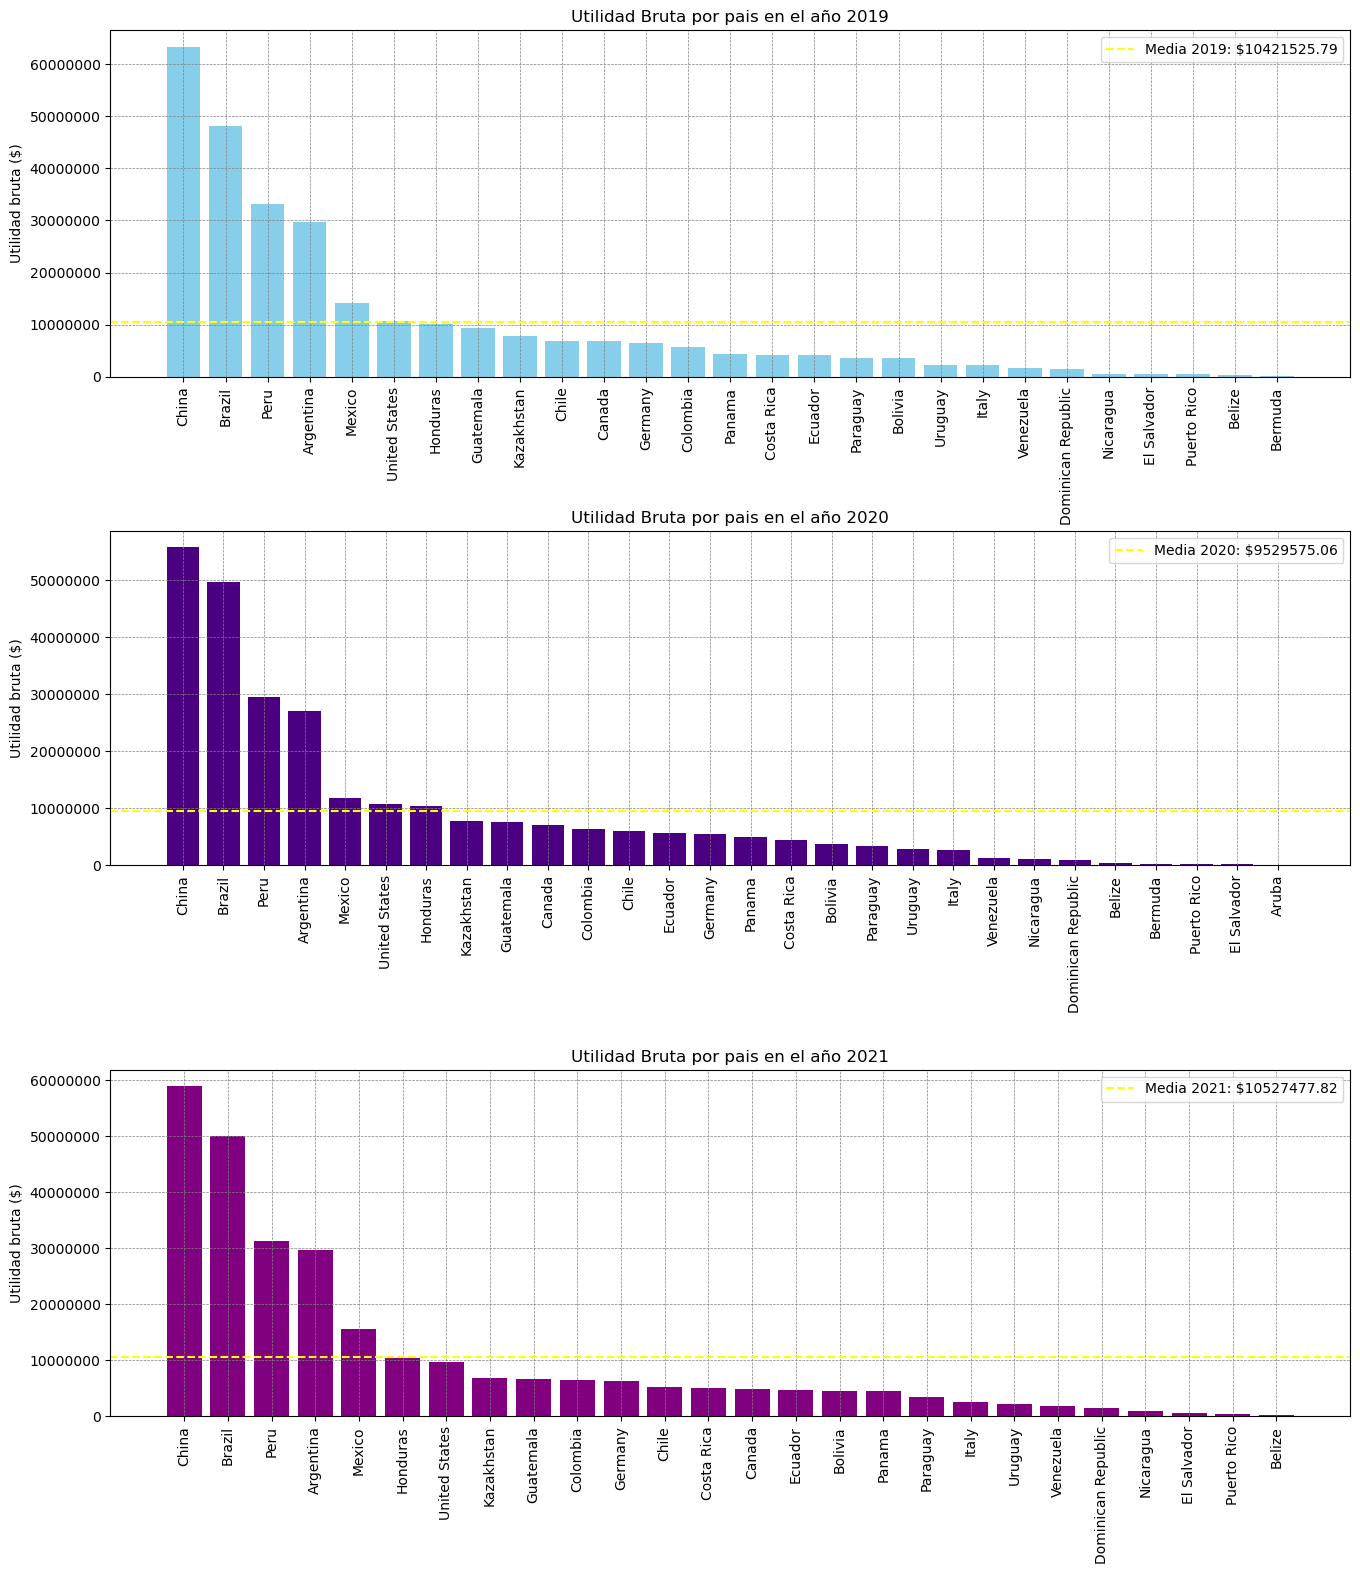

In [48]:
plt.figure(figsize=(16,180))
plt.subplots_adjust(hspace=0.5)

# 2019
plt.subplot(27,1,1)
plt.bar(utilidadB2019['pais'], utilidadB2019['utilidad_bruta'],color='skyblue')
plt.axhline(y=media_utilidad_bruta2019, color='yellow', linestyle='--', label=f'Media 2019: ${media_utilidad_bruta2019}') #Media
plt.ylabel('Utilidad bruta ($)')
plt.title('Utilidad Bruta por pais en el año 2019')
plt.xticks(rotation=90)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend( loc= 'upper right')
plt.ticklabel_format(style='plain', axis='y')

#2020
plt.subplot(28,1,2)
plt.bar(utilidadB2020['pais'], utilidadB2020['utilidad_bruta'], color='indigo')
plt.axhline(y=media_utilidad_bruta2020, color='yellow', linestyle='--', label=f'Media 2020: ${media_utilidad_bruta2020}')#Media
plt.ylabel('Utilidad bruta ($)')
plt.title('Utilidad Bruta por pais en el año 2020')
plt.xticks(rotation=90)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend( loc= 'upper right')
plt.ticklabel_format(style='plain', axis='y')

#2021
plt.subplot(27,1,3)
plt.bar(utilidadB2021['pais'], utilidadB2021['utilidad_bruta'], color='purple')
plt.axhline(y=media_utilidad_bruta2021, color='yellow', linestyle='--', label=f'Media 2021: ${media_utilidad_bruta2021}')#Media
plt.ylabel('Utilidad bruta ($)')
plt.title('Utilidad Bruta por pais en el año 2021')
plt.xticks(rotation=90)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend( loc= 'upper right')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

**2- Grafico de puntos: de Ventas por tipo de producto en el año 2021, por tipo de comercio**

In [49]:
ventasTipoComercio = dataframe.groupby(['tipo_comercio', 'tipo_producto','año'])['ventas'].sum().reset_index()
mediaVentasTipoComercio= ventasTipoComercio['ventas'].mean().round(2)

ventasMayoristas_2021 = ventasTipoComercio[(ventasTipoComercio['tipo_comercio'] == 'Mayorista') & (ventasTipoComercio['año'] == 2021)]
ventasDeProximidad_2021 = ventasTipoComercio[(ventasTipoComercio['tipo_comercio'] == 'De Proximidad') & (ventasTipoComercio['año'] == 2021)]
ventasGrandesAlmacenes_2021 = ventasTipoComercio[(ventasTipoComercio['tipo_comercio'] == 'Grandes Almacenes') & (ventasTipoComercio['año'] == 2021)]
ventasEspecializado_2021 = ventasTipoComercio[(ventasTipoComercio['tipo_comercio'] == 'Especializado') & (ventasTipoComercio['año'] == 2021)]
ventasHipermercado_2021 = ventasTipoComercio[(ventasTipoComercio['tipo_comercio'] == 'Hipermercado') & (ventasTipoComercio['año'] == 2021)]

ventasHipermercado_2021

,tipo_comercio,tipo_producto,año,ventas
56,Hipermercado,Accesorios,2021,18560950.33
59,Hipermercado,Calzado,2021,21898449.92
62,Hipermercado,Joyas,2021,13515475.61
65,Hipermercado,Juguetes,2021,19239412.77
68,Hipermercado,Lentes,2021,20030804.63
71,Hipermercado,Vestimenta,2021,18590130.53


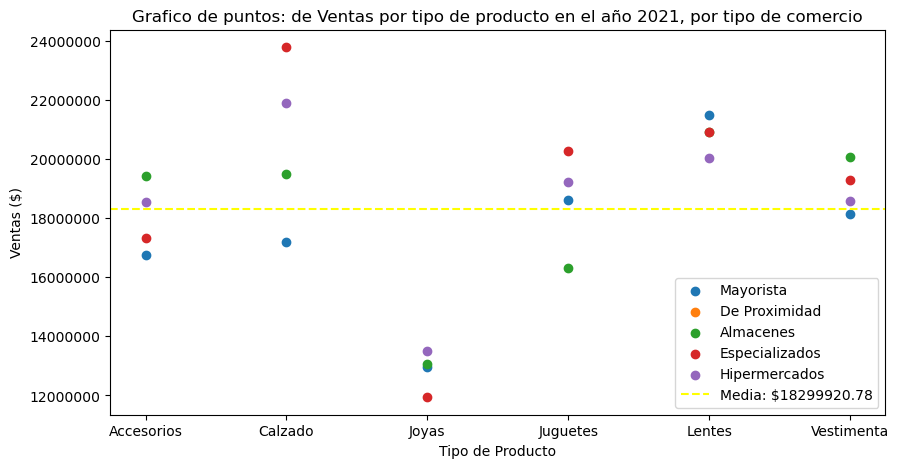

In [50]:
plt.figure(figsize=(10, 5))

plt.scatter(ventasMayoristas_2021['tipo_producto'], ventasMayoristas_2021['ventas'], label= 'Mayorista')
plt.scatter(ventasDeProximidad_2021['tipo_producto'], ventasDeProximidad_2021['ventas'], label= 'De Proximidad')
plt.scatter(ventasGrandesAlmacenes_2021['tipo_producto'], ventasGrandesAlmacenes_2021['ventas'], label= 'Almacenes')
plt.scatter(ventasEspecializado_2021['tipo_producto'], ventasEspecializado_2021['ventas'], label= 'Especializados')
plt.scatter(ventasHipermercado_2021['tipo_producto'], ventasHipermercado_2021['ventas'], label= 'Hipermercados')

plt.ticklabel_format(style='plain', axis='y')

#Media
plt.axhline(y=mediaVentasTipoComercio, color='yellow', linestyle='--', label=f'Media: ${mediaVentasTipoComercio}')

plt.title('Grafico de puntos: de Ventas por tipo de producto en el año 2021, por tipo de comercio')
plt.xlabel('Tipo de Producto')
plt.ylabel('Ventas ($)')
plt.legend(loc= 'lower right')


plt.show()

**3- Grafico de dispersión: costos en relacion a la utilidad bruta, por metodo de orden**

In [51]:
ventasUtilidadBruta = dataframe.groupby(['pais', 'metodo_orden']).agg({'utilidad_bruta': 'sum', 'costos': 'sum'}).reset_index()

ventasUtilidadBruta_Representante = ventasUtilidadBruta[ventasUtilidadBruta['metodo_orden'] == 'Representante']
ventasUtilidadBruta_Mail = ventasUtilidadBruta[ventasUtilidadBruta['metodo_orden'] == 'Mail']
ventasUtilidadBruta_Teléfono = ventasUtilidadBruta[ventasUtilidadBruta['metodo_orden'] == 'Teléfono']
ventasUtilidadBruta_Website = ventasUtilidadBruta[ventasUtilidadBruta['metodo_orden'] == 'Website']
ventasUtilidadBruta_Especial = ventasUtilidadBruta[ventasUtilidadBruta['metodo_orden'] == 'Especial']
ventasUtilidadBruta_MercadoLibre= ventasUtilidadBruta[ventasUtilidadBruta['metodo_orden'] == 'MercadoLibre']

ventasUtilidadBruta_Representante

,pais,metodo_orden,utilidad_bruta,costos
3,Argentina,Representante,14149617.96,14544185.49
10,Belize,Representante,56871.01,90665.54
19,Bolivia,Representante,1988255.46,1845304.38
25,Brazil,Representante,22718258.19,22657040.75
31,Canada,Representante,2905355.90,2806015.69
37,Chile,Representante,2208368.73,2474218.27
43,China,Representante,31697519.90,31676934.44
49,Colombia,Representante,3210088.61,3081013.90
55,Costa Rica,Representante,2028768.24,2075122.79
61,Dominican Republic,Representante,661111.10,428646.48


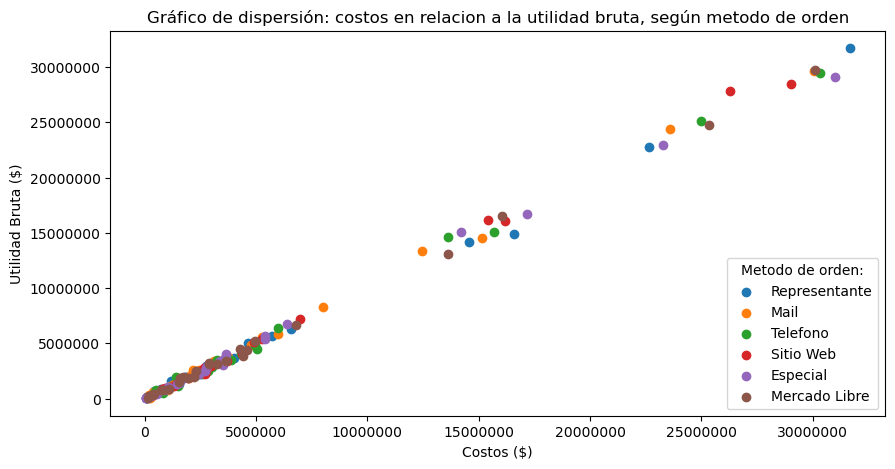

In [52]:
plt.figure(figsize=(10, 5))

plt.scatter(ventasUtilidadBruta_Representante['costos'], ventasUtilidadBruta_Representante['utilidad_bruta'], label= 'Representante')
plt.scatter(ventasUtilidadBruta_Mail['costos'], ventasUtilidadBruta_Mail['utilidad_bruta'], label= 'Mail')
plt.scatter(ventasUtilidadBruta_Teléfono['costos'], ventasUtilidadBruta_Teléfono['utilidad_bruta'], label= 'Telefono')
plt.scatter(ventasUtilidadBruta_Website['costos'], ventasUtilidadBruta_Website['utilidad_bruta'], label= 'Sitio Web')
plt.scatter(ventasUtilidadBruta_Especial['costos'], ventasUtilidadBruta_Especial['utilidad_bruta'], label= 'Especial')
plt.scatter(ventasUtilidadBruta_MercadoLibre['costos'], ventasUtilidadBruta_MercadoLibre['utilidad_bruta'], label= 'Mercado Libre')

# Evitar la notación científica en el eje "x"e "y"
plt.ticklabel_format(style='plain', axis='both')

plt.title('Gráfico de dispersión: costos en relacion a la utilidad bruta, según metodo de orden')
plt.xlabel('Costos ($)')
plt.ylabel('Utilidad Bruta ($)')
plt.legend(title = "Metodo de orden:", loc= 'lower right')


plt.show()

**4- Gráfico de serie de tiempo: "ventas anuales por paises de sudamerica"**

*Primero agrupo los valores con los que quiero trabajar*

In [53]:
ventasPorPais = dataframe.groupby(['pais', 'año']) ['ventas'].sum().reset_index().sort_values('año')
mediaVentasPorPais = ventasPorPais['ventas'].mean().round(2)

ventasArgentina = ventasPorPais[ventasPorPais['pais'] == 'Argentina']
ventasBolivia = ventasPorPais[ventasPorPais['pais'] == 'Bolivia']
ventasBrazil = ventasPorPais[ventasPorPais['pais'] == 'Brazil']
ventasChile = ventasPorPais[ventasPorPais['pais'] == 'Chile']
ventasColombia = ventasPorPais[ventasPorPais['pais'] == 'Colombia']
ventasEcuador = ventasPorPais[ventasPorPais['pais'] == 'Ecuador']
ventasParaguay = ventasPorPais[ventasPorPais['pais'] == 'Paraguay']
ventasPeru = ventasPorPais[ventasPorPais['pais'] == 'Peru']
ventasUruguay = ventasPorPais[ventasPorPais['pais'] == 'Uruguay']
ventasVenezuela = ventasPorPais[ventasPorPais['pais'] == 'Venezuela']

ventasArgentina

,pais,año,ventas
0,Argentina,2019,58466169.00
1,Argentina,2020,53562710.82
2,Argentina,2021,58202468.88


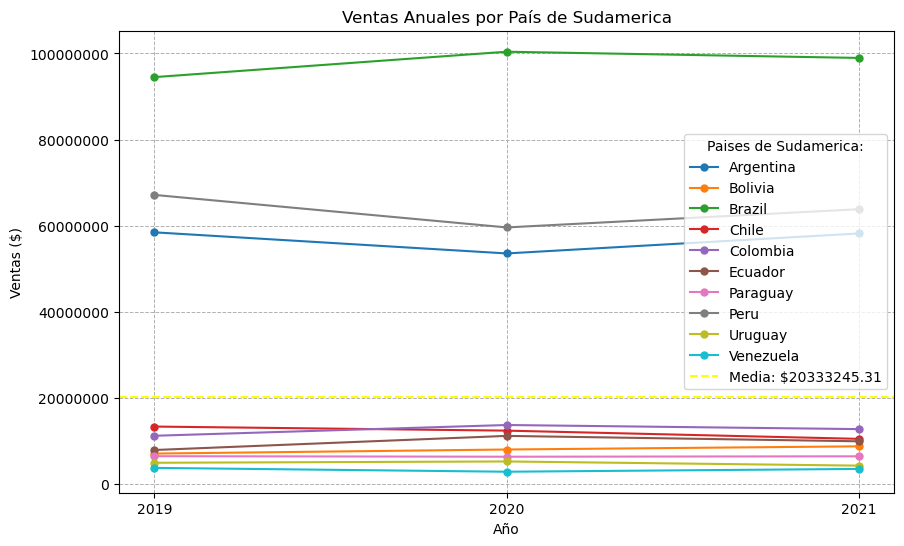

In [54]:
plt.figure(figsize=(10, 6))

plt.plot(ventasArgentina['año'], ventasArgentina['ventas'], label='Argentina', marker = 'o', ms = 5)
plt.plot(ventasBolivia['año'], ventasBolivia['ventas'], label='Bolivia', marker = 'o', ms = 5)
plt.plot(ventasBrazil['año'], ventasBrazil['ventas'], label='Brazil', marker = 'o', ms = 5)
plt.plot(ventasChile['año'], ventasChile['ventas'], label='Chile', marker = 'o', ms = 5)
plt.plot(ventasColombia['año'], ventasColombia['ventas'], label='Colombia', marker = 'o', ms = 5)
plt.plot(ventasEcuador['año'], ventasEcuador['ventas'], label='Ecuador', marker = 'o', ms = 5)
plt.plot(ventasParaguay['año'], ventasParaguay['ventas'], label='Paraguay', marker = 'o', ms = 5)
plt.plot(ventasPeru['año'], ventasPeru['ventas'], label='Peru', marker = 'o', ms = 5)
plt.plot(ventasUruguay['año'], ventasUruguay['ventas'], label='Uruguay', marker = 'o', ms = 5)
plt.plot(ventasVenezuela['año'], ventasVenezuela['ventas'], label='Venezuela', marker = 'o', ms = 5)

#Media
plt.axhline(y=mediaVentasPorPais, color='yellow', linestyle='--', label=f'Media: ${mediaVentasPorPais}')

# Establecer las marcas del eje x (ticks)
plt.xticks([2019, 2020, 2021])

# Evitar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')

# Etiquetas:
plt.xlabel('Año')
plt.ylabel('Ventas ($)')
plt.title('Ventas Anuales por País de Sudamerica')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.legend(title = "Paises de Sudamerica:")

plt.show()

**5- Graficos de torta "Utilidad bruta anual por tipo de Comercio" y "Utilidad bruta anual por tipo de producto"**

In [55]:
utilidadBPorTipoComercio = dataframe.groupby('tipo_comercio')['utilidad_bruta'].sum().reset_index()
utilidadBPorTipoComercio 


,tipo_comercio,utilidad_bruta
0,De proximidad,1.674391e+08
1,Especializado,1.669397e+08
2,Grandes Almacenes,1.620038e+08
3,Hipermercado,1.629094e+08
4,Mayorista,1.626318e+08


In [56]:
utilidadBPorTipoProducto = dataframe.groupby('tipo_producto')['utilidad_bruta'].sum().reset_index()
utilidadBPorTipoProducto 

,tipo_producto,utilidad_bruta
0,Accesorios,1.406469e+08
1,Calzado,1.599379e+08
2,Joyas,1.015212e+08
3,Juguetes,1.348097e+08
4,Lentes,1.482080e+08
5,Vestimenta,1.367999e+08


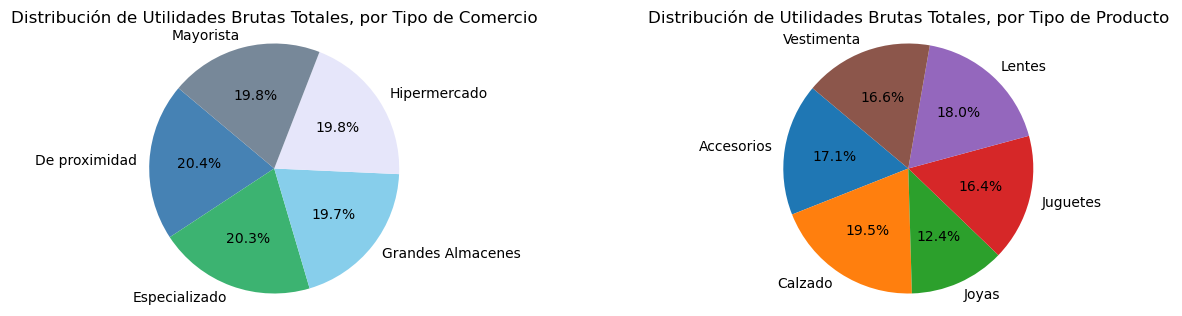

In [57]:
plt.figure(figsize=(15, 25))

# Utilidades Brutas Totales, por Tipo de Comercio
plt.subplot(6,2,1)
plt.pie(utilidadBPorTipoComercio['utilidad_bruta'], labels=utilidadBPorTipoComercio['tipo_comercio'], autopct='%1.1f%%', startangle=140, colors = ['SteelBlue', 'MediumSeaGreen', 'SkyBlue', 'Lavender', 'LightSlateGray', 'Turquoise'])
plt.title('Distribución de Utilidades Brutas Totales, por Tipo de Comercio')
plt.axis('equal') 

# Utilidades Brutas Totales, por Tipo de Producto
plt.subplot(6,2,2)
plt.pie(utilidadBPorTipoProducto['utilidad_bruta'], labels=utilidadBPorTipoProducto['tipo_producto'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Utilidades Brutas Totales, por Tipo de Producto')
plt.axis('equal') 

plt.show()

**6- Grafico de barras horizontales, de tipo de productos mas vendidos por paises de Sudamerica"**

In [58]:
tipoProductoPorPais = dataframe.groupby(['pais', 'tipo_producto']) ['ventas'].sum().reset_index()

tipoProductoArgentina = tipoProductoPorPais[tipoProductoPorPais['pais'] == 'Argentina']
tipoProductoBolivia = tipoProductoPorPais[tipoProductoPorPais['pais'] == 'Bolivia']
tipoProductoBrazil = tipoProductoPorPais[tipoProductoPorPais['pais'] == 'Brazil']
tipoProductoChile = tipoProductoPorPais[tipoProductoPorPais['pais'] == 'Chile']
tipoProductoColombia = tipoProductoPorPais[tipoProductoPorPais['pais'] == 'Colombia']
tipoProductoEcuador = tipoProductoPorPais[tipoProductoPorPais['pais'] == 'Ecuador']
tipoProductoParaguay = tipoProductoPorPais[tipoProductoPorPais['pais'] == 'Paraguay']
tipoProductoPeru = tipoProductoPorPais[tipoProductoPorPais['pais'] == 'Peru']
tipoProductoUruguay = tipoProductoPorPais[tipoProductoPorPais['pais'] == 'Uruguay']
tipoProductoVenezuela = tipoProductoPorPais[tipoProductoPorPais['pais'] == 'Venezuela']

tipoProductoArgentina


,pais,tipo_producto,ventas
0,Argentina,Accesorios,24744343.93
1,Argentina,Calzado,33072547.78
2,Argentina,Joyas,24647083.67
3,Argentina,Juguetes,26641977.95
4,Argentina,Lentes,33085227.41
5,Argentina,Vestimenta,28040167.96


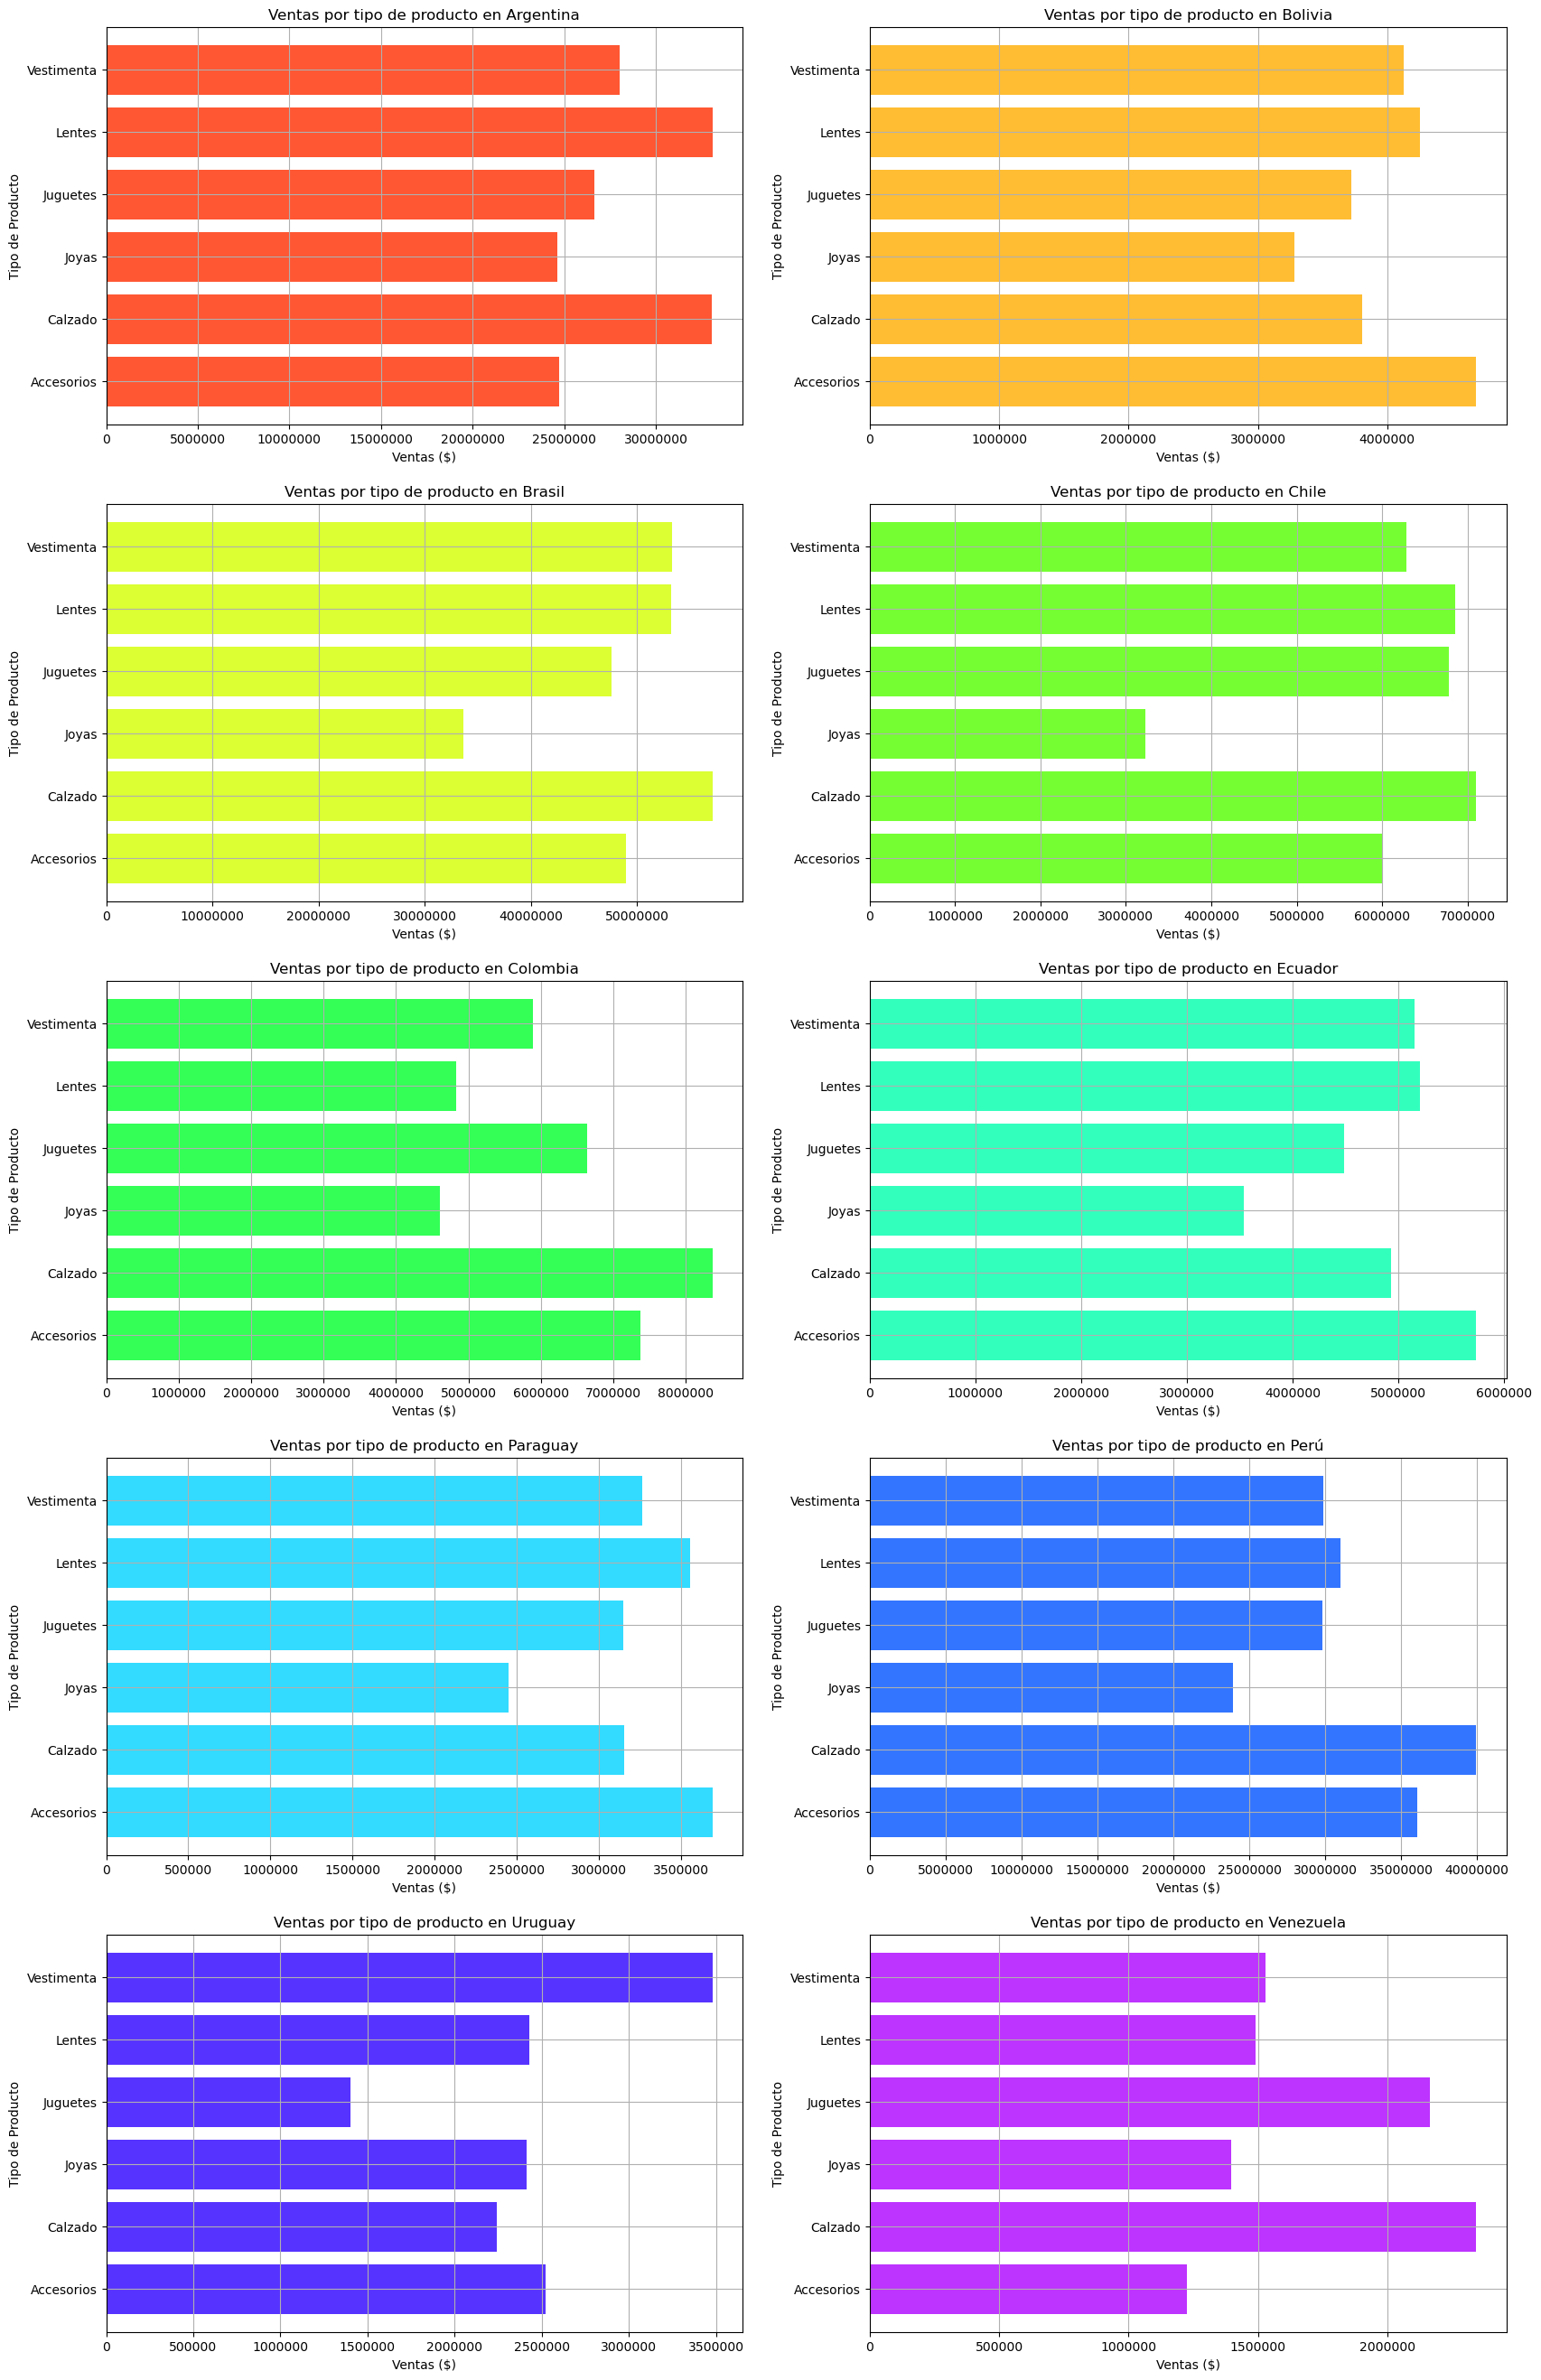

In [59]:
# Ajusto el tamaño dle plot, ya que quedaban muy juntos los graficos
plt.figure(figsize=(20, 40))

# Argentina
plt.subplot(6,2,1)
plt.barh(tipoProductoArgentina['tipo_producto'], tipoProductoArgentina['ventas'], color= "#FF5733")
plt.title('Ventas por tipo de producto en Argentina')
plt.grid(True)
plt.xlabel('Ventas ($)')
plt.ylabel('Tipo de Producto')
plt.ticklabel_format(style='plain', axis='x')

# Bolivia
plt.subplot(6,2,2)
plt.barh(tipoProductoBolivia['tipo_producto'], tipoProductoBolivia['ventas'], color= "#FFBD33")
plt.title('Ventas por tipo de producto en Bolivia')
plt.grid(True)
plt.xlabel('Ventas ($)')
plt.ylabel('Tipo de Producto')
plt.ticklabel_format(style='plain', axis='x')

# Brazil
plt.subplot(6,2,3)
plt.barh(tipoProductoBrazil['tipo_producto'], tipoProductoBrazil['ventas'], color= "#DBFF33")
plt.title('Ventas por tipo de producto en Brasil')
plt.grid(True)
plt.xlabel('Ventas ($)')
plt.ylabel('Tipo de Producto')
plt.ticklabel_format(style='plain', axis='x')

# Chile
plt.subplot(6,2,4)
plt.barh(tipoProductoChile['tipo_producto'], tipoProductoChile['ventas'], color= "#75FF33")
plt.title('Ventas por tipo de producto en Chile')
plt.grid(True)
plt.xlabel('Ventas ($)')
plt.ylabel('Tipo de Producto')
plt.ticklabel_format(style='plain', axis='x')

# Colombia
plt.subplot(6,2,5)
plt.barh(tipoProductoColombia['tipo_producto'], tipoProductoColombia['ventas'], color= "#33FF57")
plt.title('Ventas por tipo de producto en Colombia')
plt.grid(True)
plt.xlabel('Ventas ($)')
plt.ylabel('Tipo de Producto')
plt.ticklabel_format(style='plain', axis='x')

# Ecuador
plt.subplot(6,2,6)
plt.barh(tipoProductoEcuador['tipo_producto'], tipoProductoEcuador['ventas'], color= "#33FFBD")
plt.title('Ventas por tipo de producto en Ecuador')
plt.grid(True)
plt.xlabel('Ventas ($)')
plt.ylabel('Tipo de Producto')
plt.ticklabel_format(style='plain', axis='x')

# Paraguay
plt.subplot(6,2,7)
plt.barh(tipoProductoParaguay['tipo_producto'], tipoProductoParaguay['ventas'], color= "#33DBFF")
plt.title('Ventas por tipo de producto en Paraguay')
plt.grid(True)
plt.xlabel('Ventas ($)')
plt.ylabel('Tipo de Producto')
plt.ticklabel_format(style='plain', axis='x')

# Peru
plt.subplot(6,2,8)
plt.barh(tipoProductoPeru['tipo_producto'], tipoProductoPeru['ventas'], color= "#3375FF")
plt.title('Ventas por tipo de producto en Perú')
plt.grid(True)
plt.xlabel('Ventas ($)')
plt.ylabel('Tipo de Producto')
plt.ticklabel_format(style='plain', axis='x')

# Uruguay
plt.subplot(6,2,9)
plt.barh(tipoProductoUruguay['tipo_producto'], tipoProductoUruguay['ventas'], color= "#5733FF")
plt.title('Ventas por tipo de producto en Uruguay')
plt.grid(True)
plt.xlabel('Ventas ($)')
plt.ylabel('Tipo de Producto')
plt.ticklabel_format(style='plain', axis='x')

# Venezuela
plt.subplot(6,2,10)
plt.barh(tipoProductoVenezuela['tipo_producto'], tipoProductoVenezuela['ventas'], color='#BD33FF')
plt.title('Ventas por tipo de producto en Venezuela')
plt.grid(True)
plt.xlabel('Ventas ($)')
plt.ylabel('Tipo de Producto')
plt.ticklabel_format(style='plain', axis='x')

plt.show()

**7-Grafico Histograma de  tipos de productos vendidos por cuatrimestres en China**

*Se selecciona China ya que es la moda de la columna paises*